In [2]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras

In [4]:
model = keras.models.load_model('mnist_train_model1')

In [10]:
from pathlib import Path
import requests

DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True, exist_ok=True)

URL = "http://deeplearning.net/data/mnist"
FILENAME = "mnist.pkl.gz"

if not(PATH / FILENAME).exists():
    content = requests.get(URL + FILENAME).content
    (PATH / FILENAME).open("wb").write(content)

In [11]:
import pickle
import gzip

with gzip.open((PATH/FILENAME).as_posix(), "rb") as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

(50000, 784)


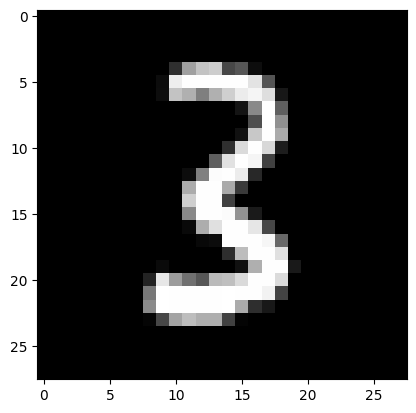

In [23]:
from matplotlib import pyplot
import numpy as np

pyplot.imshow(x_train[0].reshape((28,28)), cmap="gray")
print(x_train.shape)

In [18]:
predictions = model.predict(x_valid)

313/313 [==============================] - 0s 1ms/step


In [14]:
test_loss, test_acc = model.evaluate(x_valid, y_valid, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.1425 - sparse_categorical_accuracy: 0.9576 - 477ms/epoch - 2ms/step

Test accuracy: 0.9575999975204468


In [45]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img.reshape((28,28)), cmap="gray")
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{}{:2.0f}%({})".format(class_names[predicted_label],
                                       np.max(predictions_array),
                                       class_names[true_label]),
                                       color = color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color = "#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    
class_names = ['0', '1', '2', '3', '4',
              '5', '6', '7', '8', '9']


(10,)

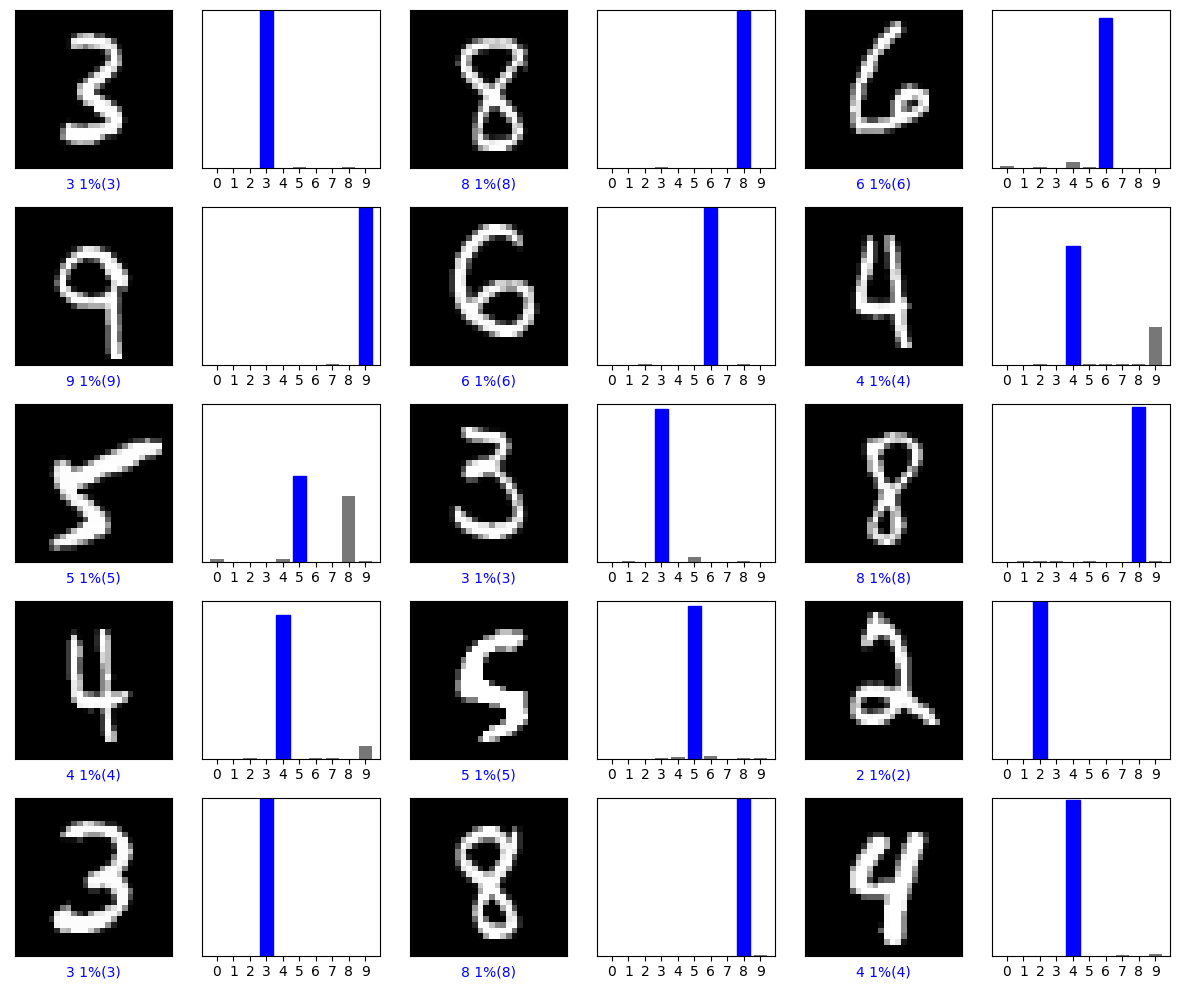

In [46]:
import matplotlib.pyplot as plt
import numpy as np
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i + 1)
    plot_image(i, predictions[i], y_valid, x_valid)
    plt.subplot(num_rows, 2*num_cols, 2*i + 2)
    plot_value_array(i, predictions[i], y_valid)
plt.tight_layout()
plt.show()